In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_polygon(vertices, title, color='blue'):
    closed_vertices = np.vstack([vertices, vertices[0]])  # Close the polygon
    plt.plot(closed_vertices[:, 0], closed_vertices[:, 1], marker='o', color=color)
    plt.title(title)
    plt.axis('equal')
    plt.grid(True)

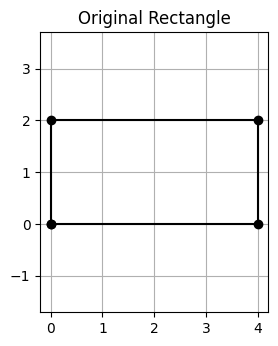

In [ ]:
if __name__ == "__main__":
    # Define a rectangle
    rectangle = np.array([
        [0, 0],
        [4, 0],
        [4, 2],
        [0, 2]
    ])

    plt.figure(figsize=(10, 8))

    # Original rectangle
    plt.subplot(2, 3, 1)
    plot_polygon(rectangle, "Original Rectangle", color='black')


In [ ]:
def translate(vertices, tx, ty):
    translation_matrix = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    return apply_transformation(vertices, translation_matrix)

def scale(vertices, sx, sy):
    scaling_matrix = np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])
    return apply_transformation(vertices, scaling_matrix)

def rotate(vertices, angle):
    radians = np.radians(angle)
    rotation_matrix = np.array([
        [np.cos(radians), -np.sin(radians), 0],
        [np.sin(radians), np.cos(radians), 0],
        [0, 0, 1]
    ])
    return apply_transformation(vertices, rotation_matrix)

def reflect(vertices, axis):
    if axis == 'x':
        reflection_matrix = np.array([
            [1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    elif axis == 'y':
        reflection_matrix = np.array([
            [-1, 0, 0],
            [0, 1, 0],
            [0, 0, 1]
        ])
    elif axis == 'origin':
        reflection_matrix = np.array([
            [-1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    else:
        raise ValueError("Invalid axis. Choose 'x', 'y', or 'origin'.")
    return apply_transformation(vertices, reflection_matrix)

def shear(vertices, shx, shy):
    shearing_matrix = np.array([
        [1, shx, 0],
        [shy, 1, 0],
        [0, 0, 1]
    ])
    return apply_transformation(vertices, shearing_matrix)

def apply_transformation(vertices, transformation_matrix):
    homogeneous_vertices = np.hstack((vertices, np.ones((vertices.shape[0], 1))))
    transformed_vertices = homogeneous_vertices @ transformation_matrix.T
    return transformed_vertices[:, :2]

def composite_transformations(vertices, transformations):
    composite_matrix = np.eye(3)  # Start with the identity matrix
    for matrix in transformations:
        composite_matrix = composite_matrix @ matrix
    return apply_transformation(vertices, composite_matrix)


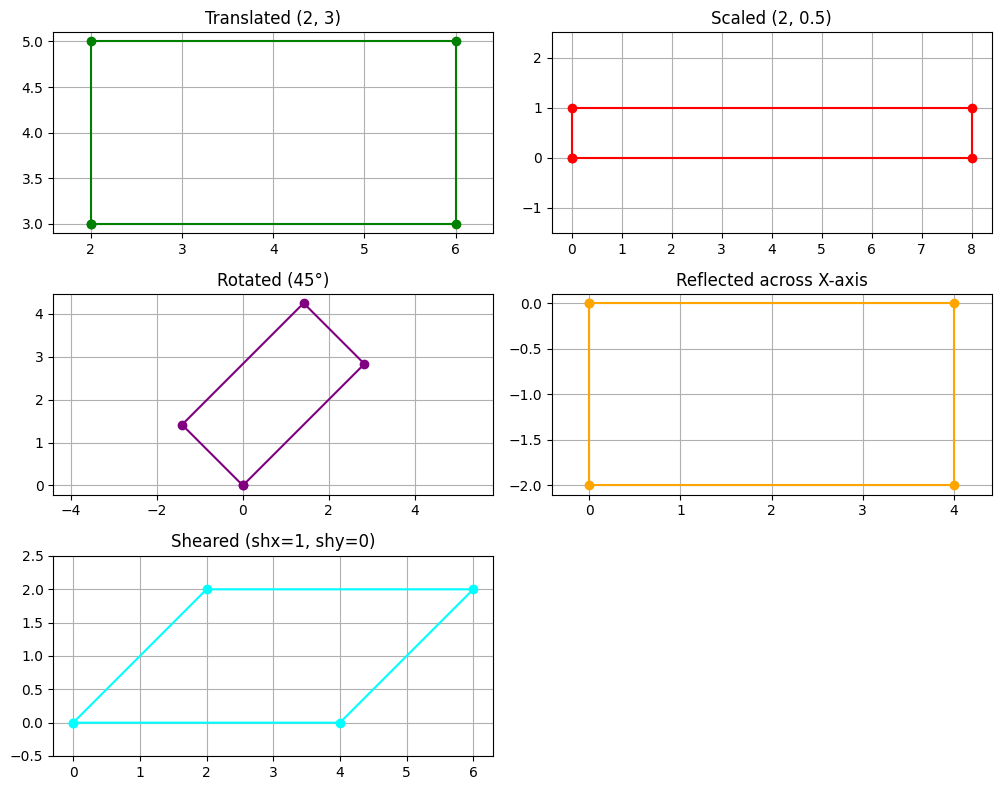

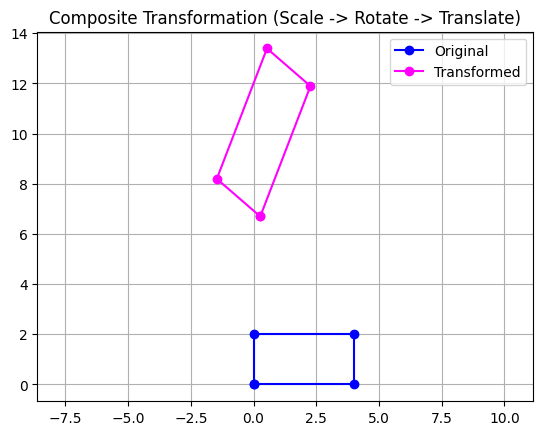

In [ ]:
if __name__ == "__main__":
    # Define a rectangle
    rectangle = np.array([
        [0, 0],
        [4, 0],
        [4, 2],
        [0, 2]
    ])

    plt.figure(figsize=(10, 8))

    # Translated rectangle
    plt.subplot(3,2,1)
    plot_polygon(translate(rectangle, 2, 3), "Translated (2, 3)", color='green')

    # Scaled rectangle
    plt.subplot(3,2,2)
    plot_polygon(scale(rectangle, 2, 0.5), "Scaled (2, 0.5)", color='red')

    # Rotated rectangle
    plt.subplot(3, 2, 3)
    plot_polygon(rotate(rectangle, 45), "Rotated (45°)", color='purple')

    # Reflected rectangle
    plt.subplot(3,2, 4)
    plot_polygon(reflect(rectangle, 'x'), "Reflected across X-axis", color='orange')

    # Sheared rectangle
    plt.subplot(3,2, 5)
    plot_polygon(shear(rectangle, 1, 0), "Sheared (shx=1, shy=0)", color='cyan')

    plt.tight_layout()
    plt.show()

    # Composite transformations
    scale_matrix = np.array([
        [1, 0, 0],
        [0, 1.5, 0],
        [0, 0, 1]
    ])
    rotate_matrix = np.array([
        [np.cos(np.radians(60)), -np.sin(np.radians(60)), 0],
        [np.sin(np.radians(60)), np.cos(np.radians(60)), 0],
        [0, 0, 1]
    ])
    translate_matrix = np.array([
        [1, 0, 4],
        [0, 1, 2],
        [0, 0, 1]
    ])

    composite_result = composite_transformations(rectangle, [scale_matrix, rotate_matrix, translate_matrix])

    plt.figure()
    plot_polygon(rectangle, "Original Rectangle", color='blue')
    plot_polygon(composite_result, "Composite Transformation (Scale -> Rotate -> Translate)", color='magenta')
    plt.legend(["Original", "Transformed"])
    plt.show()

In [ ]:
# Task 2: Image Transformations Using OpenCV
!pip install opencv-python #installing the opencv library
import cv2 # importing the cv2 library
import numpy as np
import matplotlib.pyplot as plt

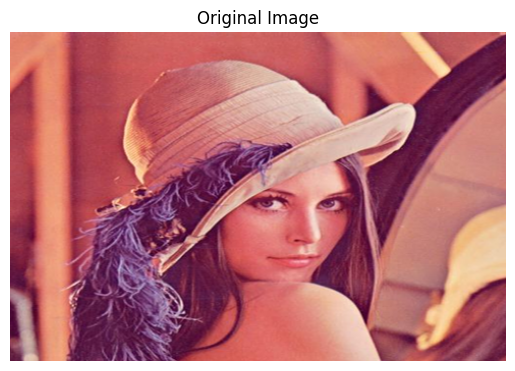

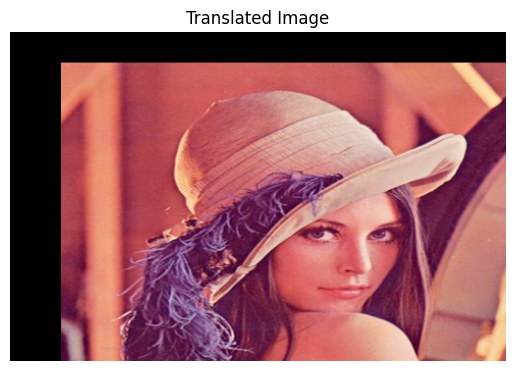

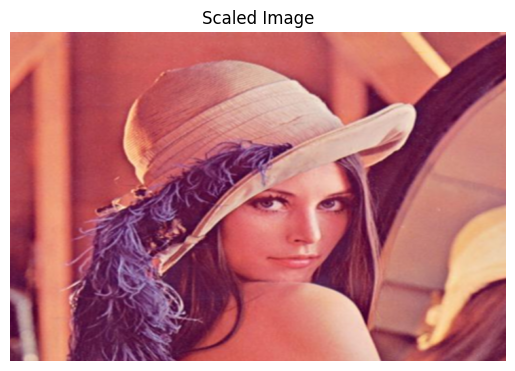

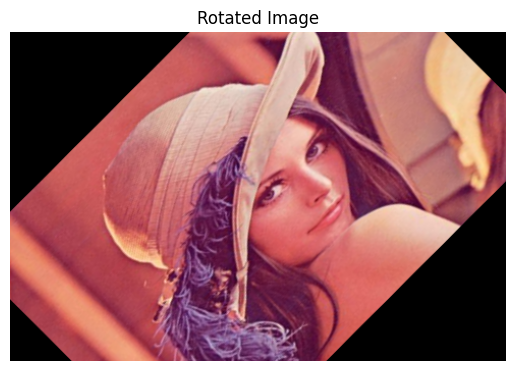

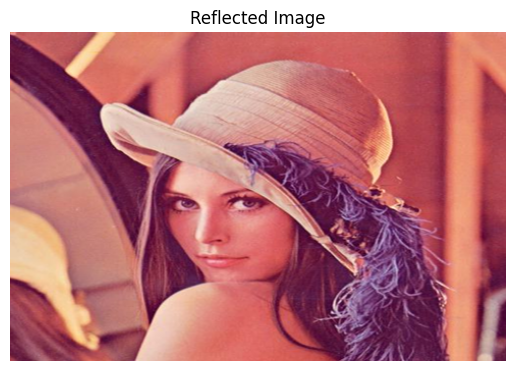

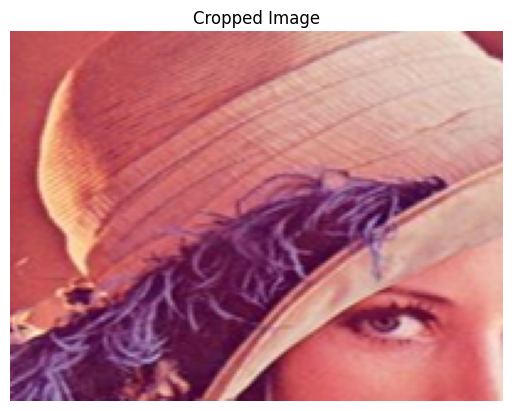

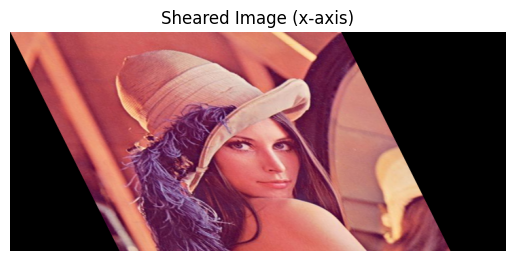

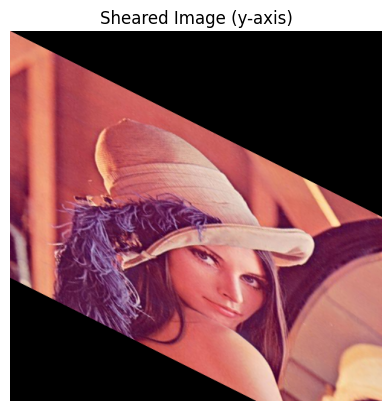

In [ ]:
def transform_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    def show_image(image, title):
        plt.figure()
        plt.imshow(image)
        plt.title(title)
        plt.axis('off')
        plt.show()

    show_image(img, "Original Image")

    # Image Translation
    translation_matrix = np.float32([[1, 0, 50], [0, 1, 30]])
    translated_img = cv2.warpAffine(img, translation_matrix, (w, h))
    show_image(translated_img, "Translated Image")

    # Scaling
    scaled_img = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)
    show_image(scaled_img, "Scaled Image")

    # Rotation
    rotation_matrix = cv2.getRotationMatrix2D((w // 2, h // 2), 45, 1)
    rotated_img = cv2.warpAffine(img, rotation_matrix, (w, h))
    show_image(rotated_img, "Rotated Image")

    # Reflection (flip vertically)
    reflected_img = cv2.flip(img, 1)
    show_image(reflected_img, "Reflected Image")

    # Cropping
    cropped_img = img[50:200, 100:300]
    show_image(cropped_img, "Cropped Image")

    # Shearing (x-axis)
    shear_matrix_x = np.float32([[1, 0.5, 0], [0, 1, 0]])
    sheared_img_x = cv2.warpAffine(img, shear_matrix_x, (int(1.5 * w), h))
    show_image(sheared_img_x, "Sheared Image (x-axis)")

    # Shearing (y-axis)
    shear_matrix_y = np.float32([[1, 0, 0], [0.5, 1, 0]])
    sheared_img_y = cv2.warpAffine(img, shear_matrix_y, (w, int(1.5 * h)))
    show_image(sheared_img_y, "Sheared Image (y-axis)")


transform_image("/content/test.png")
